<a href="https://colab.research.google.com/github/NigamaVeena/AQI-prediction-and-deployment/blob/main/Deployment_AQI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q streamlit

     |████████████████████████████████| 7.5MB 8.3MB/s 
     |████████████████████████████████| 163kB 38.3MB/s 
     |████████████████████████████████| 81kB 9.5MB/s 
     |████████████████████████████████| 4.6MB 38.1MB/s 
     |████████████████████████████████| 112kB 39.0MB/s 
     |████████████████████████████████| 71kB 8.3MB/s 
     |████████████████████████████████| 122kB 51.6MB/s 
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.0 which is incompatible.


In [2]:
import pandas as pd
import numpy as np
combine_data= pd.read_csv(r'/content/Real_Combine.csv')
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
X_train, X_test, y_train, y_test = train_test_split(
    combine_data.iloc[:,:-1],
    combine_data.iloc[:,-1],
    test_size=0.3,
    random_state=0)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [3]:
y_train.isnull().any()

True

In [4]:
y_train=y_train.fillna(method='ffill')

In [5]:

y_train.isnull().any()

False

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   40.1s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  8.5min finished


NameError: ignored

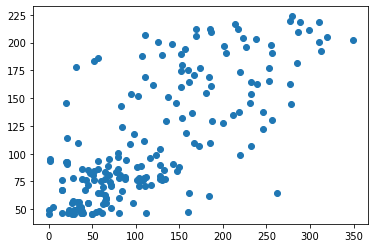

In [6]:
from sklearn.ensemble import RandomForestRegressor
# Hyperparameter tuning with RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
# Hyparameter ranges
from scipy.stats import randint
parameters = {'n_estimators': randint(100,1200),
               'max_features': ['auto','sqrt'],
               'max_depth': randint(5,40),
               'min_samples_split': randint(2,30),
               'min_samples_leaf': randint(1,10)  }
# Model for tuning
base_learner=RandomForestRegressor()
# Tuning
tuned_model= RandomizedSearchCV(estimator = base_learner, param_distributions = parameters,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs =-1)
tuned_model.fit(X_train,y_train)
tuned_model.best_params_
{'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 16,
 'n_estimators': 901}
tuned_model.best_score_
#-3425.3665578465598
# Predicting X_test values using tuned_model
prediction=tuned_model.predict(X_test)
plt.scatter(y_test,prediction)
print('MSE:', metrics.mean_squared_error(y_test, prediction))

In [7]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 43.53093323404908
MSE: 3287.2939380819116
RMSE: 57.334927732420766


In [10]:
import pickle
pickle_out = open("Random_forest_regressornew.pkl","wb")
pickle.dump(tuned_model, pickle_out)
pickle_out.close()

In [1]:
%%writefile appnew.py
import numpy as np
import pandas as pd
import pickle
import streamlit as st



pickle_in = open("Random_forest_regressornew.pkl","rb")
random_forest_regressor=pickle.load(pickle_in)


def welcome():
    return " welcome all"



def predict_AQI(T,TM,Tm,SLP,H,VV,V,Vm):
    
    
    prediction=random_forest_regressor.predict([[ T,TM,Tm,SLP,H,VV,V,Vm]])
    print(prediction)
    return prediction


def main():
    st.title("Hyderabad AQI prediction")
    html_temp = """
    <div style="background-color:green;padding:20px">
    <h2 style="color:white;text-align:center;">AQI prediction ML App </h2>
    </div>
    """
    st.markdown(html_temp,unsafe_allow_html=True)
    T = st.text_input("Average_Temperature ","Type Here")
    TM = st.text_input("Maximum_Temperature ","Type Here")
    Tm = st.text_input("Minimum_Temperature ","Type Here")
    SLP = st.text_input("Atm_pressure_at_sea_level ","Type Here")
    H = st.text_input("Average_relative_Humidity ","Type Here")
    VV = st.text_input("Average_visibility ","Type Here")
    V = st.text_input("Average_wind_speed ","Type Here")
    Vm = st.text_input("Maximum sustained wind speed ","Type Here")
    result=""
    if st.button("Predict"):
        result=predict_AQI(T,TM,Tm,SLP,H,VV,V,Vm)
    st.success('The output is {}'.format(result))
    if st.button("About"):
        st.text("project by VEENA SAI NIGAMA")
        st.text(" 2021 ")

if __name__=='__main__':
    main()

Writing appnew.py


In [2]:
!wget https://github.com/NigamaVeena/AQI-prediction-and-deployment/blob/main/appnew.py

--2021-03-17 10:37:43--  https://github.com/NigamaVeena/AQI-prediction-and-deployment/blob/main/appnew.py
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘appnew.py.1’

appnew.py.1             [ <=>                ] 122.69K  --.-KB/s    in 0.02s   

2021-03-17 10:37:43 (5.46 MB/s) - ‘appnew.py.1’ saved [125633]



In [11]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

--2021-03-17 10:49:31--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 3.88.74.186, 34.234.81.220, 34.198.117.197, ...
Connecting to bin.equinox.io (bin.equinox.io)|3.88.74.186|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.13M  18.6MB/s    in 0.7s    

2021-03-17 10:49:32 (18.6 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13773305/13773305]



In [12]:
!unzip ngrok-stable-linux-amd64.zip

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [13]:
get_ipython().system_raw('./ngrok http 8501 &')

In [14]:
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    'import sys, json; print("Execute the next cell and the go to the following URL: " +json.load(sys.stdin)["tunnels"][0]["public_url"])'

Execute the next cell and the go to the following URL: https://13afb8def9d5.ngrok.io


In [ ]:
!streamlit run /content/appnew.py


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://34.83.79.141:8501

[151.32878883]
[151.32878883]
